In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from sklearn import linear_model
import matplotlib.pyplot as plt

from sklearn.linear_model import LassoCV 

# DataFrame № 1 💎

Будем решать задачу предсказания цены бриллианта в зависимости от его характеристик

https://www.kaggle.com/datasets/shivam2503/diamonds

In [2]:
data = pd.read_csv('diamonds.csv')

In [3]:
data.head(5)

,Unnamed: 0,carat,cut,color,clarity,depth,table,price,x,y,z
0,1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75


In [4]:
data.shape

(53940, 11)

In [5]:
data.describe()

,Unnamed: 0,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,26970.500000,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,15571.281097,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,1.000000,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,13485.750000,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,26970.500000,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,40455.250000,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,53940.000000,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  53940 non-null  int64  
 1   carat       53940 non-null  float64
 2   cut         53940 non-null  object 
 3   color       53940 non-null  object 
 4   clarity     53940 non-null  object 
 5   depth       53940 non-null  float64
 6   table       53940 non-null  float64
 7   price       53940 non-null  int64  
 8   x           53940 non-null  float64
 9   y           53940 non-null  float64
 10  z           53940 non-null  float64
dtypes: float64(6), int64(2), object(3)
memory usage: 4.5+ MB


✅ Есть ли в наборе данных пропущенные значения?

In [7]:
data.isnull().any().any()

False

✅ Есть ли в наборе данных признаки, не несущие полезной информации?

In [8]:
data = data.drop("Unnamed: 0", axis=1)

✅ Дополнительно происследуйте данные, которые кажутся интересными на ваш взгяд

Представим, что мы не владеем информацией о том, как устроены наши данные.

In [9]:
data

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [10]:
data["color"].unique()

array(['E', 'I', 'J', 'H', 'F', 'G', 'D'], dtype=object)

In [11]:
data["color"].nunique()

7

In [12]:
data["color"].value_counts()

color
G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: count, dtype: int64

✅ Исследуем вещественные признаки. Посмотрим на матрицу выборочных корреляций между всеми вещественными признаками и целевой переменной.

- Какие вещественные признаки коррелируют с целевой переменной больше всего?

In [13]:
data_corr = data.drop(['cut', 'color', 'clarity'], axis = 1)

In [14]:
data_corr.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.028224,0.181618,0.921591,0.975094,0.951722,0.953387
depth,0.028224,1.000000,-0.295779,-0.010647,-0.025289,-0.029341,0.094924
table,0.181618,-0.295779,1.000000,0.127134,0.195344,0.183760,0.150929
price,0.921591,-0.010647,0.127134,1.000000,0.884435,0.865421,0.861249
x,0.975094,-0.025289,0.195344,0.884435,1.000000,0.974701,0.970772
y,0.951722,-0.029341,0.183760,0.865421,0.974701,1.000000,0.952006
z,0.953387,0.094924,0.150929,0.861249,0.970772,0.952006,1.000000


<Axes: >

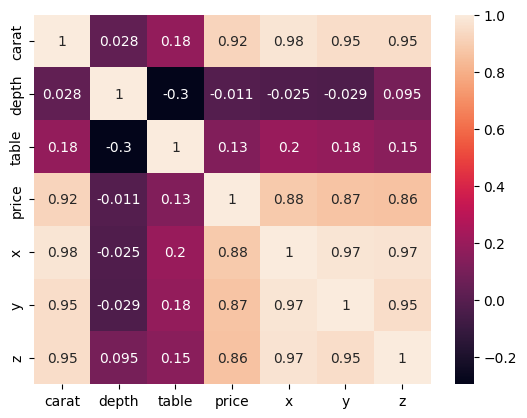

In [15]:
sns.heatmap(data_corr.corr(), annot=True)

✅ Работаем с категориальными признаками. Закодируйте все категориальные признаки.

In [16]:
ohe = OneHotEncoder(sparse = True, drop = 'first')

In [17]:
X_obj = data.select_dtypes('object')

In [18]:
ohe.fit(X_obj)

OneHotEncoder(drop='first')

In [19]:
codes = ohe.transform(X_obj).toarray()

In [20]:
codes

array([[0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.]])

In [21]:
feature_names = ohe.get_feature_names(['cut', 'color', 'clarity'])

C:\Users\kayle\AppData\Roaming\Python\Python311\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
feature_names

array(['cut_Good', 'cut_Ideal', 'cut_Premium', 'cut_Very Good', 'color_E',
       'color_F', 'color_G', 'color_H', 'color_I', 'color_J',
       'clarity_IF', 'clarity_SI1', 'clarity_SI2', 'clarity_VS1',
       'clarity_VS2', 'clarity_VVS1', 'clarity_VVS2'], dtype=object)

In [23]:
data_coded = pd.concat([data.select_dtypes(exclude='object'),
                pd.DataFrame(codes, columns=feature_names).astype(int)], axis =1)

In [24]:
data_coded

,carat,depth,table,price,x,y,z,cut_Good,cut_Ideal,cut_Premium,...,color_H,color_I,color_J,clarity_IF,clarity_SI1,clarity_SI2,clarity_VS1,clarity_VS2,clarity_VVS1,clarity_VVS2
0,0.23,61.5,55.0,326,3.95,3.98,2.43,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1,0.21,59.8,61.0,326,3.89,3.84,2.31,0,0,1,...,0,0,0,0,1,0,0,0,0,0
2,0.23,56.9,65.0,327,4.05,4.07,2.31,1,0,0,...,0,0,0,0,0,0,1,0,0,0
3,0.29,62.4,58.0,334,4.20,4.23,2.63,0,0,1,...,0,1,0,0,0,0,0,1,0,0
4,0.31,63.3,58.0,335,4.34,4.35,2.75,1,0,0,...,0,0,1,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
53935,0.72,60.8,57.0,2757,5.75,5.76,3.50,0,1,0,...,0,0,0,0,1,0,0,0,0,0
53936,0.72,63.1,55.0,2757,5.69,5.75,3.61,1,0,0,...,0,0,0,0,1,0,0,0,0,0
53937,0.70,62.8,60.0,2757,5.66,5.68,3.56,0,0,0,...,0,0,0,0,1,0,0,0,0,0
53938,0.86,61.0,58.0,2757,6.15,6.12,3.74,0,0,1,...,1,0,0,0,0,1,0,0,0,0


✅ Разделите выборку на тренировочную и тестовую. Долю тестовой выборки укажите равной 0.3.

In [25]:
X = data_coded.drop('price', axis=1)
y = data['price']

In [26]:
np.random.seed(10)

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

✅ Отмасштабируйте вещественные признаки. Объясните почему это необходимо?

In [28]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

✅ Оцените линейную регрессию на тренировочной выборке. Выведите среднеквадратичную ошибку на тренировочной и тестовой выборках.

In [29]:
lin_regr = LinearRegression()
lin_regr.fit(X_train, y_train)

LinearRegression()

In [30]:
print("MSE train: ", mean_squared_error(y_train, lin_regr.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, lin_regr.predict(X_test)))

MSE train:  1268454.9559615587
MSE test:  1303126.7488467365


✅ Выведите полученные оценки коэффициентов LinearRegression. Проанализируйте полученные коэффициенты.

In [31]:
coef_df = pd.DataFrame(lin_regr.coef_, index = X.columns, columns=['coef'])
coef_df.sort_values(by=['coef'])

,coef
x,-959.001979
color_J,-513.635437
color_I,-431.944388
color_H,-349.279490
z,-238.038613
color_G,-190.841862
color_F,-102.443444
color_E,-78.915265
depth,-73.111300
table,-67.588760


✅ Можно заметить из анализа корреляционной матрицы, что между некоторыми признаками имеется сильная корреляция, что может быть индикатором проблемы мультиколлинеарности. 

Различия в порядке коэффициентов, выявленные в предыдущей задаче также намекают на её присутствие. 

- Попробуйте провести регуляризацию модели, чтобы избавиться от данной проблемы: Lasso-регрессию и Ridge-регрессию, уставновив гиперпараметр регуляризации равным 10.
- Сильно ли уменьшились веса?

$$
\|y - X\hat{w}\|^2 + \alpha\sum_{i=1}^k|w_i|
$$

$$
\|y - X\hat{w}\|^2 + \frac{1}{2}\alpha\|w\|^2
$$

In [32]:
lasso = linear_model.Lasso(alpha=10)

In [33]:
lasso.fit(X_train, y_train)

Lasso(alpha=10)

In [34]:
print("MSE train: ", mean_squared_error(y_train, lasso.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, lasso.predict(X_test)))

MSE train:  1330335.8661404857
MSE test:  1367367.0408547525


In [35]:
coef_lasso = pd.DataFrame(lasso.coef_, index = X.columns, columns=['coef_lasso']).sort_values(by=["coef_lasso"])

In [36]:
ridge = linear_model.Ridge(alpha=10)
ridge.fit(X_train, y_train)

Ridge(alpha=10)

In [37]:
print("MSE train: ", mean_squared_error(y_train, ridge.predict(X_train)))
print("MSE test: ", mean_squared_error(y_test, ridge.predict(X_test)))

MSE train:  1268581.4112912412
MSE test:  1303825.362568905


In [38]:
coef_ridge = pd.DataFrame(ridge.coef_, index = X.columns, columns=["coef_ridge"]).sort_values(by=["coef_ridge"])

In [39]:
df = pd.concat([coef_df, coef_lasso, coef_ridge], axis=1)

In [40]:
df

,coef,coef_lasso,coef_ridge
carat,5268.334845,4789.301380,5231.924260
depth,-73.111300,-86.418657,-70.737168
table,-67.588760,-76.384212,-67.727091
x,-959.001979,-488.898100,-906.609607
y,80.663235,-0.000000,71.895193
z,-238.038613,-194.282630,-247.347874
cut_Good,180.155737,55.057846,180.791648
cut_Ideal,421.771664,216.790822,423.061718
cut_Premium,345.464522,157.065492,346.348511
cut_Very Good,319.333157,149.175622,320.827107


✅ Lasso-регрессию можно использовать для отбора наиболее информативных признаков. Для следующих значений параметра регуляриазции  𝛼: 0.1, 1, 10, 100, 200 – обучите Lasso- и Ridge-регрессии. 

Понаблюдайте за изменением евклидовой нормы весов. Как известно, норма является численной характеристикой величины вектора, а потому по норме можно судить о том, насколько большие элементы содержит вектор оценок коэффициентов.

Какой метод агрессивнее уменьшает веса? 

In [41]:
alphas = [0.1, 1, 10, 100, 200]
lasso_euclid = []
ridge_euclid = []

In [42]:
print('Евклидовы нормы весов Лассо')
for i in range(len(alphas)):
    lasso = linear_model.Lasso(alpha = alphas[i])
    lasso.fit(X_train, y_train)
    lasso_euclid.append(np.linalg.norm(lasso.coef_))
print(lasso_euclid)

print('--------------------')

print('Евклидовы нормы весов Риджа')
for i in range(len(alphas)):
    ridge = linear_model.Ridge(alpha = alphas[i])
    ridge.fit(X_train, y_train)
    ridge_euclid.append(np.linalg.norm(ridge.coef_))
print(ridge_euclid)

Евклидовы нормы весов Лассо


[6622.347890309587, 6496.721036627039, 5346.090230121039, 3844.5750308244296, 3558.821444983833]
--------------------
Евклидовы нормы весов Риджа
[6636.589561423134, 6629.894491317157, 6564.347717436143, 6015.400027073404, 5554.06932445971]


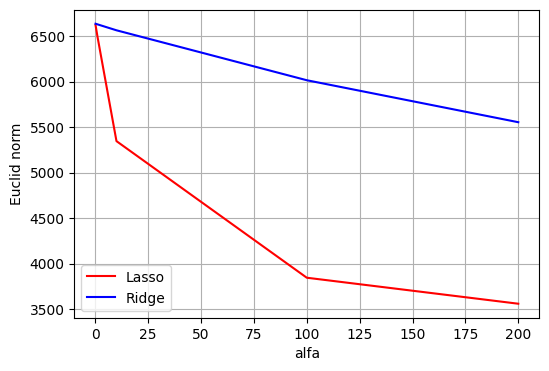

In [43]:
x = alphas
fig, ax = plt.subplots(figsize = (6,4))

y1 = lasso_euclid
y2 = ridge_euclid

ax.plot(x, y1, color='red', label='Lasso')
ax.plot(x, y2, color='blue', label='Ridge')

ax.grid(True)
plt.xlabel('alfa')
plt.ylabel('Euclid norm')

leg = ax.legend(loc='lower left', frameon=True)

✅ В зависимости от значения параметра  𝛼 в Lasso-регрессии зануляются разные оценки коэффициентов. Подберите оптимальное значение коэффициента регуляризации по тренировочной выборке.

In [44]:
reg = LassoCV(cv=5, n_alphas = 10, random_state=0).fit(X_train, y_train)

value_reg = reg.alphas_
array_error = reg.mse_path_

a = []
for i in range(len(array_error)):
    m = np.mean(array_error[i])
    a.append(m)

d1 = {"MSE_1": pd.Series(a), "alphas_1": pd.Series(value_reg)}
df1 = pd.DataFrame(d1)
print(df1)

          MSE_1     alphas_1
0  1.566133e+07  3652.239911
1  5.248532e+06  1695.219599
2  2.993146e+06   786.851236
3  2.496720e+06   365.223991
4  2.029796e+06   169.521960
5  1.702045e+06    78.685124
6  1.560325e+06    36.522399
7  1.421370e+06    16.952196
8  1.310760e+06     7.868512
9  1.280495e+06     3.652240


In [45]:
reg = LassoCV(cv=5, alphas = [0.1, 1, 10, 100, 200], random_state=0).fit(X_train, y_train)

value_reg = reg.alphas_
array_error = reg.mse_path_

a = []
for i in range(len(array_error)):
    m = np.mean(array_error[i])
    a.append(m)

d2 = {"MSE_2": pd.Series(a), "alphas_2": pd.Series(value_reg)}
df2 = pd.DataFrame(d2)
print(df2)

C:\Users\kayle\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_coordinate_descent.py:634: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 1093147004.2313004, tolerance: 47234925.03802861
  model = cd_fast.enet_coordinate_descent_gram(


          MSE_2  alphas_2
0  2.132184e+06     200.0
1  1.765763e+06     100.0
2  1.333980e+06      10.0
3  1.272931e+06       1.0
4  1.272749e+06       0.1


In [46]:
print('1)', df1["MSE_1"].min())
print('2)', df2["MSE_2"].min())

1) 1280494.8250039462
2) 1272749.1596175313


✅ Обучите итоговую Lasso-регрессию с выбранным параметром  𝛼
  на тренировочной выборке. Выведите полученные коэффициенты и прокомментируйте, какие признаки оказались неинформативными, а какие – наиболее информативными. Приведите возможное смысловое объяснение этого результата.

In [47]:
lasso1 = linear_model.Lasso(alpha=0.1)
lasso1.fit(X_train, y_train)
print('MSE train',  mean_squared_error(y_train, lasso1.predict(X_train)))

MSE train 1268463.0723565603


In [48]:
best_lasso = pd.DataFrame(lasso1.coef_, index = X.columns, columns = ['coef_best_lasso']).sort_values(by=['coef_best_lasso'])

In [49]:
best_lasso

,coef_best_lasso
x,-947.121177
color_J,-513.028159
color_I,-431.229146
color_H,-348.546969
z,-235.136443
color_G,-190.052420
color_F,-101.771765
color_E,-78.189773
depth,-73.603751
table,-67.717120


✅ Сделайте предсказания обученной Lasso-регрессии на тестовой выборке и сравните среднеквадратичную ошибку с ошибкой обычной линейной регрессии

In [50]:
print('MSE test',  mean_squared_error(y_test, lasso1.predict(X_test)))

MSE test 1302773.907237837


In [51]:
1303126.7488467365

1303126.7488467365